In [124]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import kde
import matplotlib.cm as cm
import seaborn as sns
import math


lung3842_chr1_pre_imputation_matrices = np.load('./Inputs/PReLIM/Bovine/PReLIM.Sample.lung3842_chr1__cord_sorted.bam.chr1.npy', allow_pickle=True)[()]
lung3842_chr1_imputed_cpg2 = np.load('./Inputs/PReLIM/Bovine/PReLIM.Sample.lung3842_chr1__cord_sorted.bam.chr1_IMPUTED_CPG2.npy', allow_pickle=True)[()]
lung3842_chr1_imputed_cpg3 = np.load('./Inputs/PReLIM/Bovine/PReLIM.Sample.lung3842_chr1__cord_sorted.bam.chr1_IMPUTED_CPG3.npy', allow_pickle=True)[()]
lung3842_chr1_imputed_cpg4 = np.load('./Inputs/PReLIM/Bovine/PReLIM.Sample.lung3842_chr1__cord_sorted.bam.chr1_IMPUTED_CPG4.npy', allow_pickle=True)[()]
lung3842_chr1_imputed_cpg5 = np.load('./Inputs/PReLIM/Bovine/PReLIM.Sample.lung3842_chr1__cord_sorted.bam.chr1_IMPUTED_CPG5.npy', allow_pickle=True)[()]



headers = ['cpg_index', 'chromosome','position','end', 'methylation percentage', 'count methylated', 'count unmethylated', 'total']



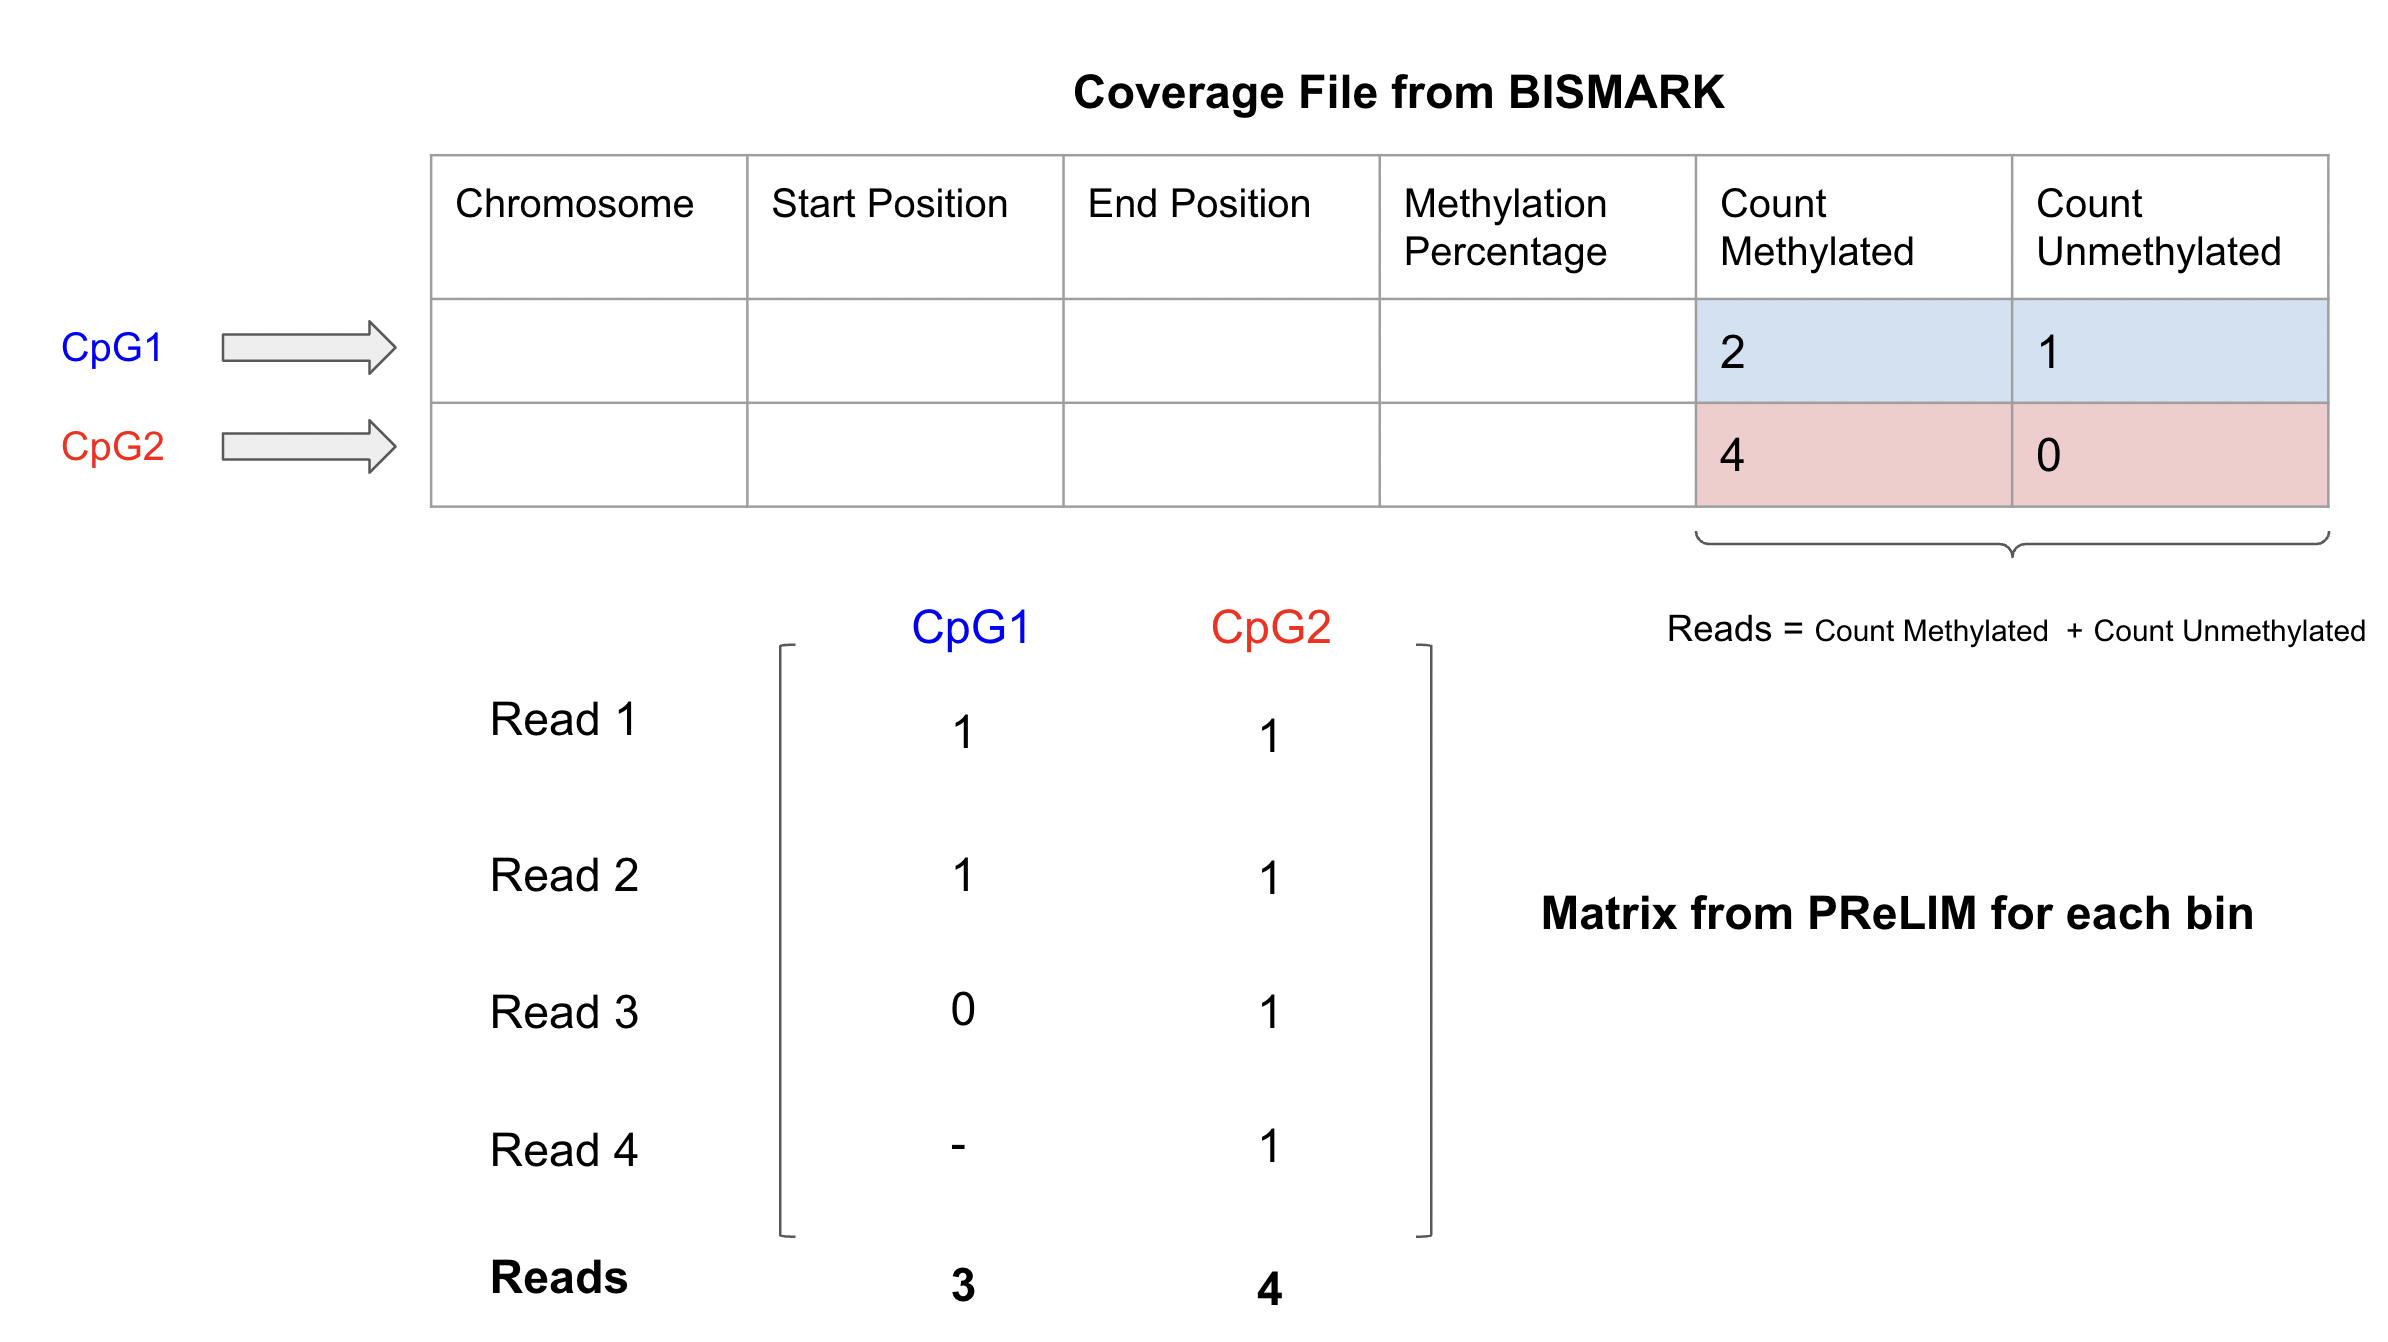

In [125]:
# <chromosome> <start position> <end position> <methylation percentage> <count methylated> <count unmethylated>
def matrices_to_cov(matrix_dictionary):
    cpg_index = []
    chromosomes = []
    positions = []
    ends = []
    methylation_percentages = []
    counts_methylated = []
    counts_unmethylated = []
    totals = []

    for key, value in matrix_dictionary.items():
        transpose = value.transpose()
        row_index = 0
        for row in transpose:
            cpg_index.append(int(key.split('_')[1]) + row_index)
            chromosomes.append(key.split('_')[0])
            positions.append(key.split('_')[1])
            ends.append(key.split('_')[1])
            num_unmethylated = (row == 0).sum()
            num_methylated = (row == 1).sum()
            methylation_percentages.append(100.0 * num_methylated/(num_methylated + num_unmethylated))
            counts_methylated.append(num_methylated)
            counts_unmethylated.append(num_unmethylated)
            totals.append(len(row))
            row_index+=1
        
    
    list_of_tuples = list(zip(cpg_index, chromosomes, positions, ends, methylation_percentages, counts_methylated, counts_unmethylated, totals))
    df = pd.DataFrame(list_of_tuples, columns=headers)
    
    return df


In [126]:
# pre-impute with all cpgs
lung3842_chr1_pre_imputation_df = matrices_to_cov(lung3842_chr1_pre_imputation_matrices)
#lung3842_chr1_pre_imputation_df[250:300]
print(lung3842_chr1_pre_imputation_df.isna().sum())

cpg_index                 0
chromosome                0
position                  0
end                       0
methylation percentage    0
count methylated          0
count unmethylated        0
total                     0
dtype: int64


In [127]:
lung3842_chr1_pre_imputation_df[350:400]

,cpg_index,chromosome,position,end,methylation percentage,count methylated,count unmethylated,total
350,43102,chr1,43100,43100,33.333333,1,2,3
351,43200,chr1,43200,43200,100.000000,3,0,3
352,43201,chr1,43200,43200,100.000000,1,0,3
353,43300,chr1,43300,43300,0.000000,0,2,3
354,43301,chr1,43300,43300,50.000000,1,1,3
355,43302,chr1,43300,43300,66.666667,2,1,3
356,43400,chr1,43400,43400,50.000000,1,1,2
357,43401,chr1,43400,43400,100.000000,2,0,2
358,43402,chr1,43400,43400,100.000000,1,0,2
359,43600,chr1,43600,43600,100.000000,1,0,1


In [128]:
# imputed with 2 cpgs
lung3842_chr1_imputed_cpg2_df = matrices_to_cov(lung3842_chr1_imputed_cpg2)
lung3842_chr1_imputed_cpg2_df[50:70]
print(lung3842_chr1_imputed_cpg2_df.isna().sum())
lung3842_chr1_imputed_cpg2_df[50:70]
# COMAPRE last row (cpg_index - 45700) from above df to first row (cpg_index - 45700) from below df. --> NOTE IMPUTATION



cpg_index                 0
chromosome                0
position                  0
end                       0
methylation percentage    0
count methylated          0
count unmethylated        0
total                     0
dtype: int64


,cpg_index,chromosome,position,end,methylation percentage,count methylated,count unmethylated,total
50,45700,chr1,45700,45700,83.333333,5,1,6
51,45701,chr1,45700,45700,60.000000,3,2,6
52,47100,chr1,47100,47100,0.000000,0,1,1
53,47101,chr1,47100,47100,0.000000,0,1,1
54,47500,chr1,47500,47500,100.000000,1,0,1
55,47501,chr1,47500,47500,100.000000,1,0,1
56,48100,chr1,48100,48100,100.000000,1,0,1
57,48101,chr1,48100,48100,0.000000,0,1,1
58,53400,chr1,53400,53400,100.000000,1,0,1
59,53401,chr1,53400,53400,100.000000,1,0,1


In [129]:
# imputed with 3 cpgs
lung3842_chr1_imputed_cpg3_df = matrices_to_cov(lung3842_chr1_imputed_cpg3)
print(lung3842_chr1_imputed_cpg3_df.isna().sum())
lung3842_chr1_imputed_cpg3_df.head()

cpg_index                 0
chromosome                0
position                  0
end                       0
methylation percentage    0
count methylated          0
count unmethylated        0
total                     0
dtype: int64


,cpg_index,chromosome,position,end,methylation percentage,count methylated,count unmethylated,total
0,19600,chr1,19600,19600,100.0,1,0,1
1,19601,chr1,19600,19600,0.0,0,1,1
2,19602,chr1,19600,19600,0.0,0,1,1
3,19800,chr1,19800,19800,0.0,0,1,1
4,19801,chr1,19800,19800,0.0,0,1,1


In [130]:
# imputed with 4 cpgs
lung3842_chr1_imputed_cpg4_df = matrices_to_cov(lung3842_chr1_imputed_cpg4)
print(lung3842_chr1_imputed_cpg4_df.isna().sum())
lung3842_chr1_imputed_cpg4_df.head()

cpg_index                 0
chromosome                0
position                  0
end                       0
methylation percentage    0
count methylated          0
count unmethylated        0
total                     0
dtype: int64


,cpg_index,chromosome,position,end,methylation percentage,count methylated,count unmethylated,total
0,19700,chr1,19700,19700,0.0,0,1,1
1,19701,chr1,19700,19700,0.0,0,1,1
2,19702,chr1,19700,19700,0.0,0,1,1
3,19703,chr1,19700,19700,0.0,0,1,1
4,20300,chr1,20300,20300,100.0,2,0,2


In [131]:
# imputed with 5 cpgs
lung3842_chr1_imputed_cpg5_df = matrices_to_cov(lung3842_chr1_imputed_cpg5)
print(lung3842_chr1_imputed_cpg5_df.isna().sum())
lung3842_chr1_imputed_cpg5_df.head()

cpg_index                 0
chromosome                0
position                  0
end                       0
methylation percentage    0
count methylated          0
count unmethylated        0
total                     0
dtype: int64


,cpg_index,chromosome,position,end,methylation percentage,count methylated,count unmethylated,total
0,29700,chr1,29700,29700,57.142857,4,3,7
1,29701,chr1,29700,29700,85.714286,6,1,7
2,29702,chr1,29700,29700,71.428571,5,2,7
3,29703,chr1,29700,29700,100.000000,7,0,7
4,29704,chr1,29700,29700,71.428571,5,2,7


In [132]:
# making cpg_index as the index of the df
lung3842_chr1_pre_imputation_df = lung3842_chr1_pre_imputation_df.reset_index(drop=True).set_index('cpg_index', drop=False)

# making cpg_index as the index of the df as imputed ones are not sorted
lung3842_chr1_imputed_cpg2_df = lung3842_chr1_imputed_cpg2_df.reset_index(drop=True).set_index('cpg_index', drop=False)
lung3842_chr1_imputed_cpg2_df.sort_index(inplace=True)

# making cpg_index as the index of the df as imputed ones are not sorted
lung3842_chr1_imputed_cpg3_df = lung3842_chr1_imputed_cpg3_df.reset_index(drop=True).set_index('cpg_index', drop=False)
lung3842_chr1_imputed_cpg3_df.sort_index(inplace=True)

# making cpg_index as the index of the df as imputed ones are not sorted
lung3842_chr1_imputed_cpg4_df = lung3842_chr1_imputed_cpg4_df.reset_index(drop=True).set_index('cpg_index', drop=False)
lung3842_chr1_imputed_cpg4_df.sort_index(inplace=True)

# making cpg_index as the index of the df as imputed ones are not sorted
lung3842_chr1_imputed_cpg5_df = lung3842_chr1_imputed_cpg5_df.reset_index(drop=True).set_index('cpg_index', drop=False)
lung3842_chr1_imputed_cpg5_df.sort_index(inplace=True)



In [133]:
# replacing pre-impute rows with imputed ones if available

lung3842_chr1_pre_imputation_df.loc[lung3842_chr1_pre_imputation_df['cpg_index'].isin(lung3842_chr1_imputed_cpg2_df['cpg_index']), ['methylation percentage', 'count methylated','count unmethylated', 'total']] = lung3842_chr1_imputed_cpg2_df[['methylation percentage', 'count methylated','count unmethylated', 'total']]
lung3842_chr1_pre_imputation_df.loc[lung3842_chr1_pre_imputation_df['cpg_index'].isin(lung3842_chr1_imputed_cpg3_df['cpg_index']), ['methylation percentage', 'count methylated','count unmethylated', 'total']] = lung3842_chr1_imputed_cpg3_df[['methylation percentage', 'count methylated','count unmethylated', 'total']]
lung3842_chr1_pre_imputation_df.loc[lung3842_chr1_pre_imputation_df['cpg_index'].isin(lung3842_chr1_imputed_cpg4_df['cpg_index']), ['methylation percentage', 'count methylated','count unmethylated', 'total']] = lung3842_chr1_imputed_cpg4_df[['methylation percentage', 'count methylated','count unmethylated', 'total']]
lung3842_chr1_pre_imputation_df.loc[lung3842_chr1_pre_imputation_df['cpg_index'].isin(lung3842_chr1_imputed_cpg5_df['cpg_index']), ['methylation percentage', 'count methylated','count unmethylated', 'total']] = lung3842_chr1_imputed_cpg5_df[['methylation percentage', 'count methylated','count unmethylated', 'total']]


lung3842_chr1_df_replaced = lung3842_chr1_pre_imputation_df
# df with cpgs having imputed reads replaced 
print(lung3842_chr1_df_replaced.isna().sum())
lung3842_chr1_df_replaced.head(30)


cpg_index                 0
chromosome                0
position                  0
end                       0
methylation percentage    0
count methylated          0
count unmethylated        0
total                     0
dtype: int64


,cpg_index,chromosome,position,end,methylation percentage,count methylated,count unmethylated,total
cpg_index,,,,,,,,
19600,19600,chr1,19600,19600,100.0,1,0,1
19601,19601,chr1,19600,19600,0.0,0,1,1
19602,19602,chr1,19600,19600,0.0,0,1,1
19700,19700,chr1,19700,19700,0.0,0,1,1
19701,19701,chr1,19700,19700,0.0,0,1,1
19702,19702,chr1,19700,19700,0.0,0,1,1
19703,19703,chr1,19700,19700,0.0,0,1,1
19800,19800,chr1,19800,19800,0.0,0,1,1
19801,19801,chr1,19800,19800,0.0,0,1,1


In [134]:
# This might have rows with same 'end' (and 'position') because PReLIM provides matrices based on bins. So each bin
# can have multiple CpGs. All the CpGs within the same bin has same 'end' (and 'position').
sample_cov_df = lung3842_chr1_df_replaced[['chromosome', 'position', 'end', 'methylation percentage', 'count methylated', 'count unmethylated']]
# 'cpg_index' is unique for each cpg in the whole chromosome
# if bin ending coordinate is x, x+1 is the 'cpg_index' of the first cpg in the bin ending from coordinate x. 
# x+2 is the 'cpg_index' of the second cpg in the bin ending from coordinate x. (And likewise ...)
# 'cpg_index' was created because PReLIM doesn't provide unique value for each cpg in each bin.
sample_cov_df.head()



,chromosome,position,end,methylation percentage,count methylated,count unmethylated
cpg_index,,,,,,
19600,chr1,19600,19600,100.0,1,0
19601,chr1,19600,19600,0.0,0,1
19602,chr1,19600,19600,0.0,0,1
19700,chr1,19700,19700,0.0,0,1
19701,chr1,19700,19700,0.0,0,1
